In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/cpreeldumas/Documents/GitHub/MLC_SP23/clean_data/merged_data_v3.csv", low_memory=False, index_col=[0])
df.head()


,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,boro_3,boro_4,boro_5,rs_share_diff_new,hpd_call_2017_19,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,4.0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1.0,2.0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,1.0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0.0,0.0,10.973689,0.461379,0.096629,0.037102,0.008935


In [124]:
df.query("`total_units_19` < 6").loc[:,'year_built'].describe()

count    1353.000000
mean     1938.560237
std        88.946710
min         0.000000
25%      1910.000000
50%      1930.000000
75%      2003.000000
max      2020.000000
Name: year_built, dtype: float64

In [2]:
df.query("`year_built` == 0").loc[:,'year_built'].describe()

count    12.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: year_built, dtype: float64

<AxesSubplot:>

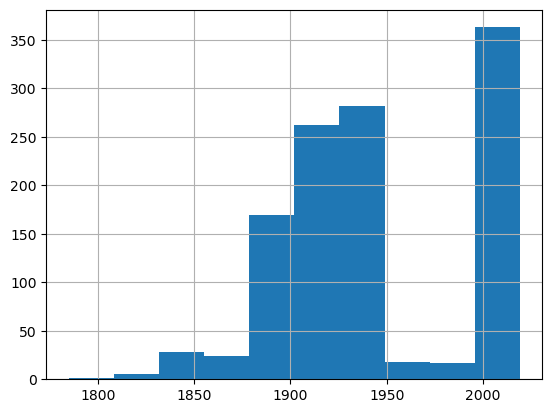

In [146]:
df.query("`total_units_19` < 6 and `year_built` > 0 and rs_share_diff_new == 1").loc[:,'year_built'].hist()

<AxesSubplot:>

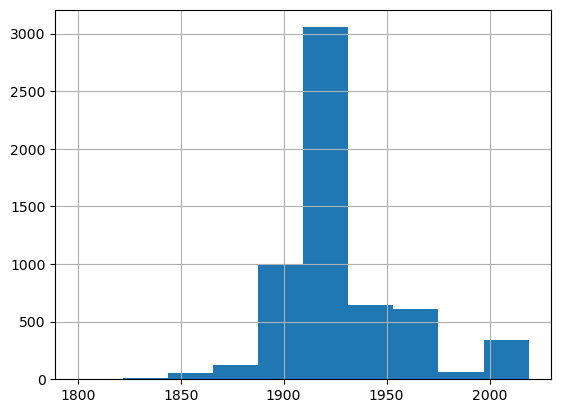

In [147]:
df.query("`total_units_19` > 6 and `year_built` > 0 and rs_share_diff_new == 1").loc[:,'year_built'].hist()

# Plain Logistic Regression, statsmodel

### Feature-importance variables

In [112]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[["total_units_19","year_built","hpd_call_2017_19", "pop_race_black_pct_19_log1", "hh_alone_pct_19", "rent_contract_med_19", "pop_edu_hs_pct_19", "hh_inc_avg_19_log1", "unit_rent_cash_mod_high_pct_19", "hh_inc_pubasst_snap_pct_19", "pop_edu_collp_pct_19", "pop_rent_pct_19", "dob_calls_2018", "dob_calls_2019", "pop_race_white_pct_19"]]
y = df['rs_share_diff_new']


logreg = sm.Logit(y, X).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.603490
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      rs_share_diff_new   No. Observations:                38967
Model:                          Logit   Df Residuals:                    38952
Method:                           MLE   Df Model:                           14
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.05765
Time:                        17:21:44   Log-Likelihood:                -23516.
converged:                       True   LL-Null:                       -24955.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
total_units_19                    -0.0029      0.000     -9.287     

### All Variables

In [113]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1)
y = df['rs_share_diff_new']

logreg = sm.Logit(y, X).fit()
print(logreg.summary())

         Current function value: 0.580162
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      rs_share_diff_new   No. Observations:                38967
Model:                          Logit   Df Residuals:                    38894
Method:                           MLE   Df Model:                           72
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.09407
Time:                        17:21:50   Log-Likelihood:                -22607.
converged:                      False   LL-Null:                       -24955.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
total_units_19                     -5.321e-05      0.000     -0.219      0.827      -0.001      

/Users/cpreeldumas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Train-test split

In [156]:
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1)
y = df['rs_share_diff_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Plain Logistic Regression, sklearn

In [149]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 

logreg = LogisticRegression()

# Training
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test,y_pred)

# AUC
y_pred_proba = logreg.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Printing the results
print("Accuracy is",accuracy)
print("AUC is", auc)

Accuracy is 0.6707041675220694
AUC is 0.6262983202626669


# Scaling

In [161]:
# scaling to have mean = 0 and std = 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# GridSearchCV with Ridge & Lasso

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

scoring = {'Accuracy':'accuracy',
           'F1 Score':'f1',
           'Precision':'precision',
           'Recall':'recall',
           'AUC':'roc_auc'}

# l1 = lasso l2 = ridge
parameters = {'penalty':['l1','l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,  
                   scoring= scoring,  
                   refit = "AUC",
                   cv=5)                    


# Training
fit = clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_) # why is there no best param for penalty? 
print("Best Score :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2'}
Best Score : 0.7011034075577105


In [179]:
# All CV metrics for best model

best_params_index = fit.cv_results_['rank_test_AUC'][0] - 1
print("Best model AUC:", fit.cv_results_['mean_test_AUC'][best_params_index])
print("Best model accuracy:", fit.cv_results_['mean_test_Accuracy'][best_params_index])
print("Best model F1 score:", fit.cv_results_['mean_test_F1 Score'][best_params_index])
print("Best model precision:", fit.cv_results_['mean_test_Precision'][best_params_index])
print("Best model recall:", fit.cv_results_['mean_test_Recall'][best_params_index])

Best model AUC: nan
Best model accuracy: nan
Best model F1 score: nan
Best model precision: nan
Best model recall: nan


In [180]:
# test set
from sklearn import metrics

y_hat_test = fit.predict(X_test) 
auc = metrics.roc_auc_score(y_test, y_hat_test)
acc = metrics.accuracy_score(y_test, y_hat_test)
f1 = metrics.f1_score(y_test, y_hat_test)
prec = metrics.precision_score(y_test, y_hat_test)
rec = metrics.recall_score(y_test, y_hat_test)

print("Out of sample AUC is:", auc)
print("Out of sample accuracy is:", acc)
print("Out of sample F1 score is:", f1)
print("Out of sample precision is:", prec)
print("Out of sample recall is:", rec)

Out of sample AUC is: 0.6334942573724401
Out of sample accuracy is: 0.7166906179429275
Out of sample F1 score is: 0.47448591012947444
Out of sample precision is: 0.6233116558279139
Out of sample recall is: 0.3830310482631417


In [181]:
logreg = LogisticRegression(C = 0.1, penalty = 'l2')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.7166906179429275


# Tuning History

In [ ]:
# Without scaling, same parameters

# Out of sample AUC is: 0.5
# Out of sample accuracy is: 0.6660849928146171
# Out of sample F1 score is: 0.0
# Out of sample precision is: 0.0
# Out of sample recall is: 0.0